# Airbnb
Note
Instructions have been included for each segment. 
You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Standard library imports

# Third party imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Local application imports
##from modules import pyneers
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#Code to diplay all data columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

error_message_ = 'Loading data, please wait...'
#Load Airbnb Data Frame and assign to a CONSTANT
print(error_message_)
try:
    error_message_ = 'System ready'
    AIRBNB_DT = pd.read_csv('csv/airbnb_cleaned.csv')
    print(error_message_)
except:
    print("Unexpected error found. Make sure CSV exist")

Loading data, please wait...
System ready


In [2]:
# Local application imports
##from modules import Airbnb
class Airbnb:
    def __init__(self, city):
        self.city = city
        self.df = AIRBNB_DT[AIRBNB_DT['state'] == self.city]
        #self.df['price'] = self.df['price'].replace('[\$,]', '', regex=True).astype(float)
        #self.df['weekly_price'] = self.df['weekly_price'].replace('[\$,]', '', regex=True).astype(float)
        #self.df['monthly_price'] = self.df['monthly_price'].replace('[\$,]', '', regex=True).astype(float)
        
        print(f"{self.city} loaded and ready to analyze")
        
    #Internal: It can be call by other method only.
    def _line_plot(self, axis_x, axis_y, title, label_x, label_y, zoom_x, zoom_y):
        line_plot_xlabel = axis_x
        line_plot_ylabel = axis_y
        
        fig, line_plot_name = plt.subplots(figsize=(8,5))
        fig.suptitle(title, fontsize='14')
        
        line_plot_name.plot(line_plot_xlabel, line_plot_ylabel)
        
        line_plot_name.grid()
        line_plot_name.set_xlabel(label_x)
        line_plot_name.set_ylabel(label_y)
        try:
            if list(zoom_x):
                line_plot_name.set_xlim(zoom_x)
        except:
            pass
        try:
            if list(zoom_y):
                line_plot_name.set_ylim(zoom_y)
        except:
            pass

        return plt.show()
    
    #Internal: It can be call by other method only.
    def _scatter_plot(self, axis_x, axis_y, title, label_x, label_y, zoom_x, zoom_y):
        fig, plot_name = plt.subplots(figsize=(18,5))
        fig.suptitle(title, fontsize='14')

        plot_name.scatter(axis_x, axis_y, color='g', marker='o', edgecolors='r')

        plot_name.grid()
        plot_name.set_xlabel(label_x)
        plot_name.set_ylabel(label_y)
        try:
            if list(zoom_x):
                plot_name.set_xlim(zoom_x)
        except:
            pass
        try:
            if list(zoom_y):
                plot_name.set_ylim(zoom_y)
        except:
            pass
        plot_name.legend(loc='best')
        return plt.show()
    
    #Internal: It can be call by other method only.
    def _bar_plot(self, axis_x, axis_y, title, label_x, label_y, zoom_x, zoom_y):
        bar_xlabel = axis_x
        bar_ylabel = axis_y
        
        fig, bar_plot_name = plt.subplots(figsize=(25,5))
        fig.suptitle(title, fontsize='14')
        
        bar_plot_name.bar(bar_xlabel, bar_ylabel, align='center', alpha=0.5)
        
        bar_plot_name.grid()
        bar_plot_name.set_xlabel(label_x)
        bar_plot_name.set_ylabel(label_y)
        try:
            if list(zoom_x):
                bar_plot_name.set_xlim(zoom_x)
        except:
            pass
        try:
            if list(zoom_y):
                bar_plot_name.set_ylim(zoom_y)
        except:
            pass

        return plt.show()
    
    #Internal: It can be call by other method only.
    def _stackedbar_plot(self, pivot_table, title, label_x, label_y, zoom_x, zoom_y):
        stkbar = pivot_table.plot(kind='bar', 
                              title=title, 
                              figsize=(25,10),
                                  stacked=True
                              #xticks=pivot_table.index
                             )
        
        stkbar.grid()
        stkbar.set_xlabel(label_x)
        stkbar.set_ylabel(label_y)
        stkbar.set_xticklabels(pivot_table['Month'])
        stkbar.legend(loc='best')
        try:
            if list(zoom_x):
                stkbar.set_xlim(zoom_x)
        except:
            pass
        try:
            if list(zoom_y):
                stkbar.set_ylim(zoom_y)
        except:
            pass
        return None
    
    #Internal: Determine whether a zoom value is valid or not
    def _is_zoom(self, zoom_val):
        if zoom_val[0] > 0 or zoom_val[1] > 0:
            return zoom_val
        else:
            return False
        
    #Reindex
    def reindex_(self, df):
        new_order = [1,11,10,9,2,4,3,7,0,8,9,5]
        df = df.reindex(new_order)
        return df
    
    #Parameters:
    # *x_zoom (list): Zoom into x axis. Most have 2 values: [10,10]
    # *y_zoom (list): Zoom into y axis. Most have 2 values: [25,55]
    def supply_month(self, x_zoom, y_zoom):
        supply_month_df = self.df.groupby('pythrs_month').id.count().reset_index()
        supply_month_df = self.reindex_(supply_month_df)
        print(f"*Average Advertising per month: {supply_month_df.id.mean()}")
        return self._bar_plot(supply_month_df['pythrs_month'],
                                  supply_month_df['id'],
                                  'Listing per month',
                                  'Months',
                                  'Listing',
                                  self._is_zoom(x_zoom),
                                  self._is_zoom(y_zoom)
                                 )
    #Create DF of Room types and count each type.
    def room_type(self, x_zoom, y_zoom):
        #Los Angeles room by category (CHECK IF THERE MANY YEARS OF DATA)
        room_type_df = self.df.groupby(['pythrs_month', 'room_type'])["id"].count().reset_index()
        room_type_df_pivot = room_type_df.pivot(index='pythrs_month', columns='room_type', values='id').reset_index()
        room_type_df_pivot.rename(columns={'pythrs_month':'Month'}, inplace=True)
        room_type_df_pivot = self.reindex_(room_type_df_pivot)
        #print(room_type_df_pivot)    
        return self._stackedbar_plot(room_type_df_pivot,
                                'Monthly Availability per Room TypeXXXX', 
                                'Month',
                                'Room Type',
                                     self._is_zoom(x_zoom),
                                     self._is_zoom(y_zoom))
        
    #Calculate daily rate. Use 'price' column to do the math
    def daily_rate(self, x_zoom, y_zoom):
        #Average daily rate per month
        daily_rate_df = self.df.groupby('pythrs_month').price.mean().reset_index()
        daily_rate_df = self.reindex_(daily_rate_df)
        print(f"Average daily rate: {daily_rate_df.price.mean()}")
        return self._bar_plot(daily_rate_df['pythrs_month'],
                                  daily_rate_df['price'],
                                  'Price per month',
                                  'Months',
                                  'Price',
                                  self._is_zoom(x_zoom),
                                  self._is_zoom(y_zoom)
                                 )
    
    def bedrooms(self, x_zoom, y_zoom):
        count_bedrooms = self.df.groupby('bedrooms')['room_type'].count().reset_index()
        count_bedrooms = count_bedrooms[count_bedrooms['bedrooms'] < 7].reset_index()
        print(count_bedrooms)
        #count_bedrooms_pivot = count_bedrooms.pivot(index = 'bedrooms', columns='room_type', values='id').reset_index()
        #print(count_bedrooms_pivot.fillna(0))
        return self._bar_plot(count_bedrooms['bedrooms'],
                              count_bedrooms['room_type'],
                              'Bedrooms per propertie',
                              'Bedrooms',
                              'Properties',
                              self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom)
                             )
    
    def review_type_room(self, x_zoom, y_zoom):
        rtr_dr = self.df.groupby('room_type').review_scores_rating.mean().reset_index()
        print(rtr_dr)
        return self._bar_plot(rtr_dr['room_type'], 
                               rtr_dr['review_scores_rating'], 
                               'Reviews per room type (%)', 'Room Type', 'Avg. Reviews', self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom))
    
    def neighborhood(self, x_zoom, y_zoom, type_):
        #print(stats.ttest_ind(self.df[self.df["neighbourhood"].count() >30]["price"], 
        #                      self.df["price"],
        #                      equal_var=False))
        if type_ == 'p':
            type_lookup = 'price'
            type_ylabel = 'Price'
            type_title = 'Avg. price per neighborhood'
        elif type_ == 'r':
            type_lookup = 'review_scores_rating'
            type_ylabel = 'Reviews scores'
            type_title = 'Avg. reviews per neighborhood'
        else:
            return f"Type {type_} doesn't exist. (p)rice and (r)eviews score rating accepted only"
        
        neig_30 = self.df.groupby('neighbourhood').agg({type_lookup: ['count', 'sum']}).reset_index()
        neig_30.columns = neig_30.columns.droplevel(0)
        neig_30.columns = ['neighbourhood', 'number', type_lookup]
        neig_30 = neig_30[(neig_30.number > 30)].sort_values('number', ascending=False).head(5)
            
        #neigh_dr = self.df.groupby('neighbourhood')[type_lookup].mean().reset_index().sort_values(type_lookup, ascending=False).head(5)
        print(neig_30)
        return self._bar_plot(neig_30['neighbourhood'],
                              neig_30[type_lookup],
                              type_title,
                              'Neighborhood', type_ylabel,
                              self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom))
    
    def price_night(self, x_zoom, y_zoom):
        usd_rate_df = self.df[['pythrs_month', 'price', 'minimum_nights']]
        usd_rate_df['pythrs_pricexnight'] = usd_rate_df['price'] * (usd_rate_df['minimum_nights'] <= 30)
        usd_rate_df = usd_rate_df.groupby('pythrs_month').pythrs_pricexnight.sum().reset_index()
        usd_rate_df.columns = ['Months', 'Estimated revenue']
        usd_rate_df = self.reindex_(usd_rate_df)
       #print(usd_rate_df)
        return self._bar_plot(usd_rate_df['Months'],
                              usd_rate_df['Estimated revenue'],
                              'Revenue per month',
                              'Month', 'Revenue',
                              self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom))
    
    def bins_nights(self):
        bins_df = self.df[self.df['pythrs_month']!='Julyx 2019']
        #print(bins_df.pythrs_month.unique)
        bins_df = bins_df[['pythrs_month', 'minimum_nights']]
        bin_ = [0, 30, 90, 91]
        bin_label = ['30 days', '90 days', 'More than 90 days']
        bins_df['pythrs_bins'] = pd.cut(bins_df['minimum_nights'], bin_, labels=bin_label)
        print(bins_df[bins_df['pythrs_bins'] == '30 days'].minimum_nights.mean())
        bins_df = bins_df.groupby(['pythrs_bins']).count().reset_index()
        del bins_df['pythrs_month']
        bins_df.columns = ['Minimum nights', '# of listing']
        return bins_df
    

# Overview Los Angeles-Airbnb market 
#### april 2018 to may 2019

In [3]:
city = Airbnb('CA')

CA loaded and ready to analyze


## Supply month

*Average Advertising per month: 43592.833333333336


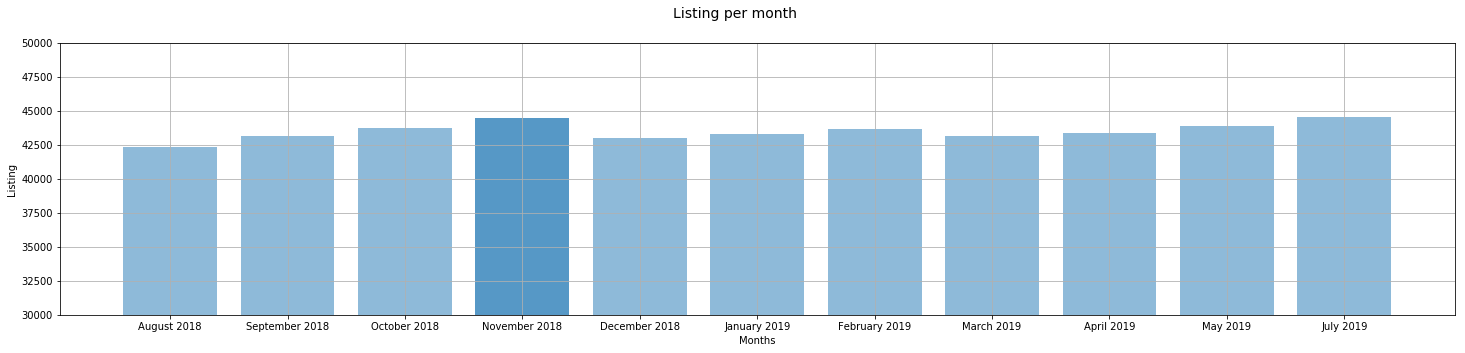

In [4]:
city.supply_month([0,0],[30000,50000])

## Daily price per month (Avg.)

Average daily rate: 199.18442781240006


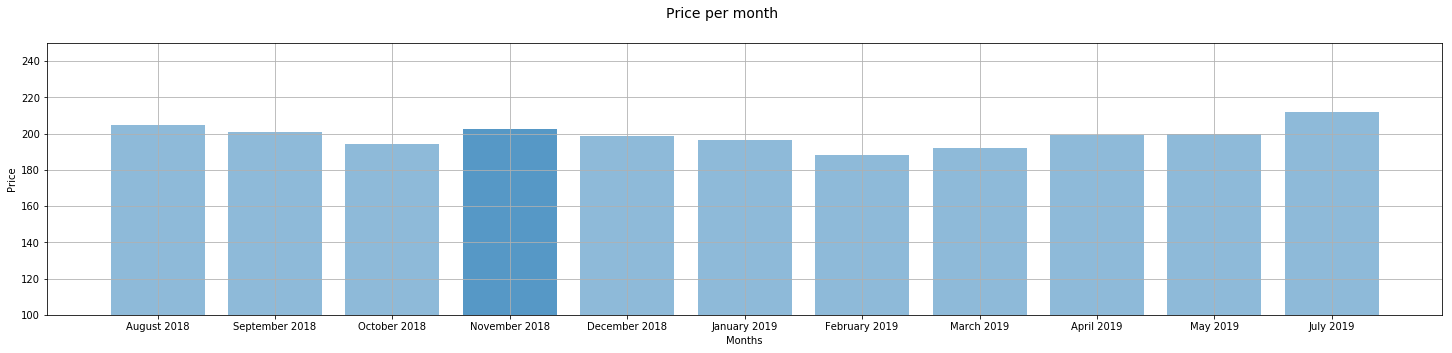

In [5]:
city.daily_rate([0,0],[100,250])
#Gráfica ordenada por mes

# Total estimated revenue in USD for bookings for 30 days or less

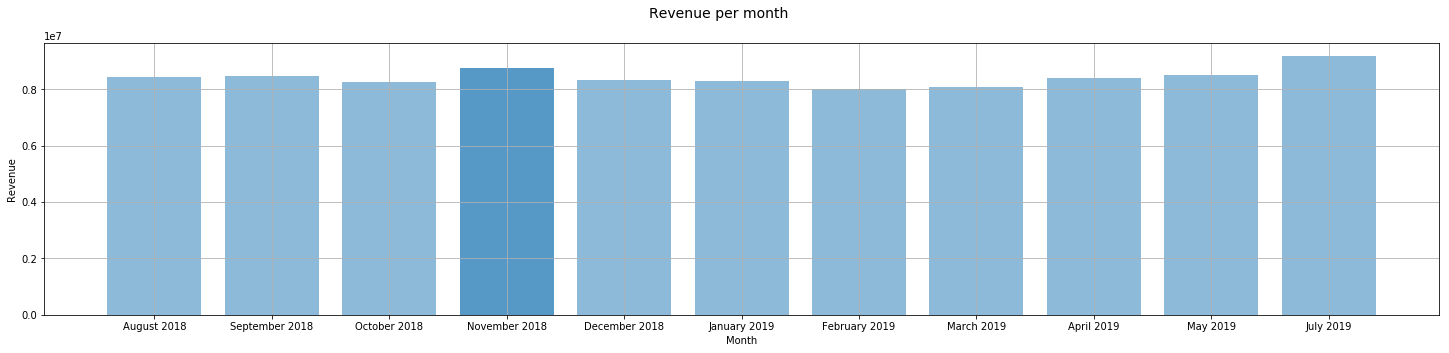

In [6]:
city.price_night([0,0],[0,0])

## Minimum nights*
#### Generar insight

In [7]:
city.bins_nights()

3.698642695605742


,Minimum nights,# of listing
0,30 days,509392
1,90 days,11471
2,More than 90 days,19


## Room Type list

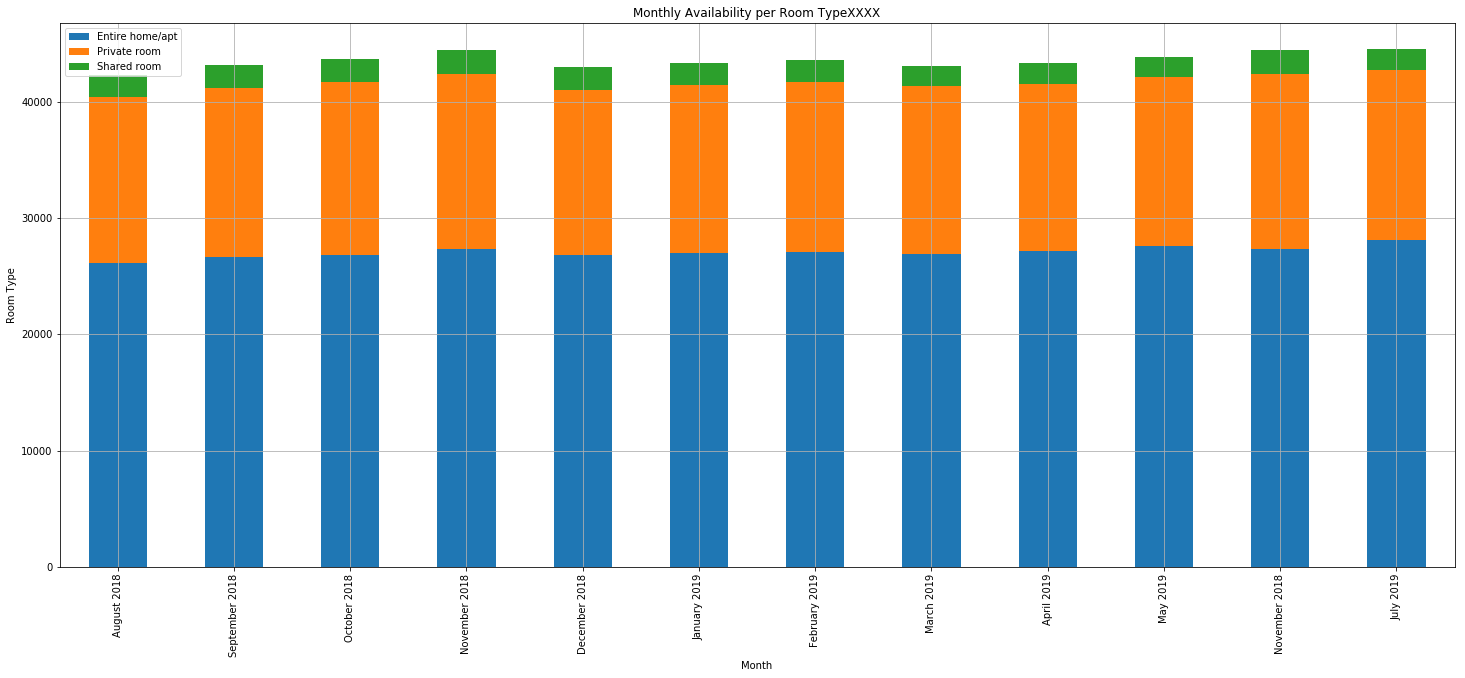

In [8]:
city.room_type([0,0],[0,0])

## Bedrooms per propertie

   index  bedrooms  room_type
0      0       0.0      56372
1      1       1.0     307432
2      2       2.0      91921
3      3       3.0      39735
4      4       4.0      16541
5      5       5.0       7099
6      6       6.0       2151


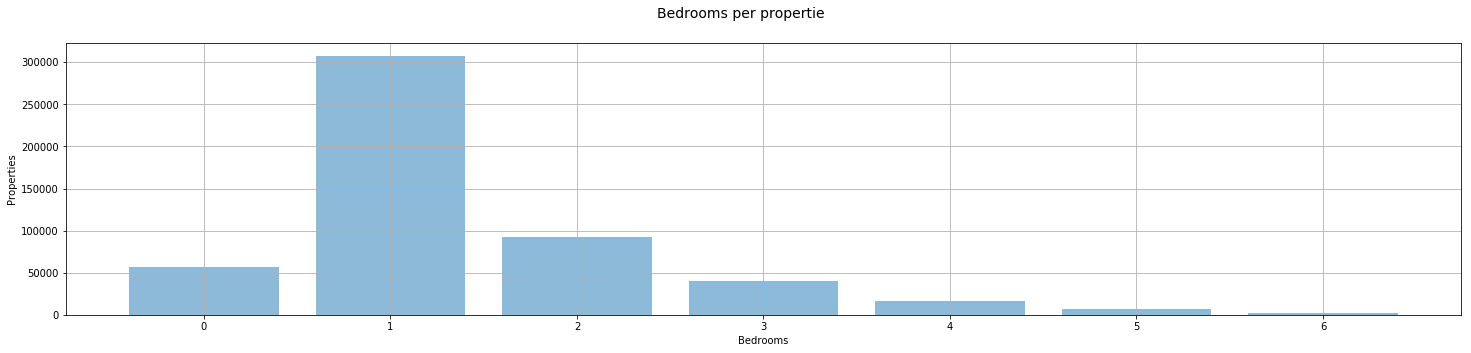

In [9]:
city.bedrooms([0,0],[0,0])
#Group by Top5

## Reviews per room type

         room_type  review_scores_rating
0  Entire home/apt             94.657516
1     Private room             94.625641
2      Shared room             89.428647


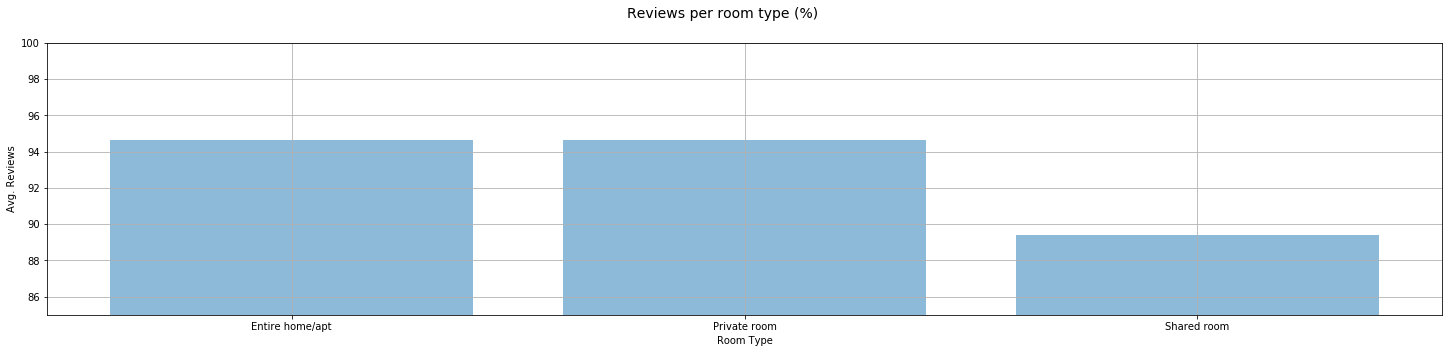

In [10]:
city.review_type_room([0,0],[85,100])

## Average Price per neighborhood (Top 5)

    neighbourhood  number      price
62      Hollywood   43094  7303569.0
89   Mid-Wilshire   39563  6369813.0
148        Venice   27860  6176901.0
36       Downtown   18237  3260585.0
79     Long Beach   17741  2332770.0


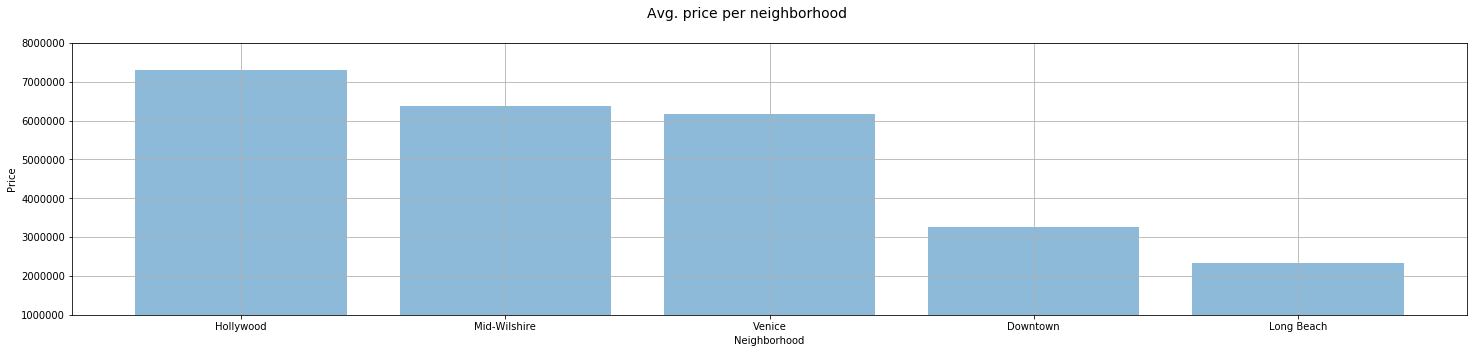

In [11]:
#Los Angeles average price per neighborhood (to get the top 5 best neighborhoods)
city.neighborhood([0,0],[1000000,8000000],'p')

    neighbourhood  number  review_scores_rating
62      Hollywood   34561             3221954.0
89   Mid-Wilshire   31485             2954634.0
148        Venice   24381             2317690.0
79     Long Beach   14954             1422854.0
36       Downtown   14763             1384800.0


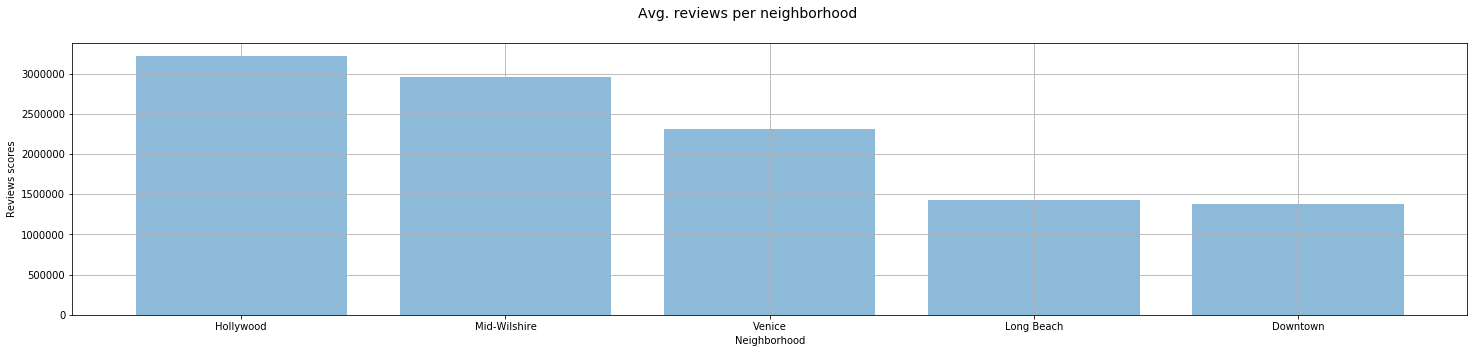

In [12]:
#Los Angeles average reviews per neighborhood (to get the top 5 best neighborhoods)
city.neighborhood([0,0],[0,0],'r')
#Graph (bars)

In [13]:
#Hipotesis nula: malos reviews con buenos reviews son las mismas
#Hipotesis alternativa: los reviews afectan al precio
#Calcular promedios de los precios con malos y buenos reviews( por debajo y encima del promedio)
#calcular promedios de los precios con buenos y malos reviews (q1 y q3)


In [14]:
#API del banco mundial para obtener salario o pib per capita y compararlo con el ingreso de airbnb mensual
#graficar

In [15]:
#numbers_df_na['price'] = numbers_df_na['price'].replace('[\$,]', '', regex=True).astype(float)
#numbers_df_na['weekly_price'] = numbers_df_na['weekly_price'].replace('[\$,]', '', regex=True).astype(float)
#numbers_df_na['monthly_price'] = numbers_df_na['monthly_price'].replace('[\$,]', '', regex=True).astype(float)

corr_df = AIRBNB_DT[['review_scores_rating',
                         'review_scores_accuracy',
                         'review_scores_cleanliness',
                         'review_scores_checkin',
                         'review_scores_communication',
                         'review_scores_location',
                         'review_scores_value']]

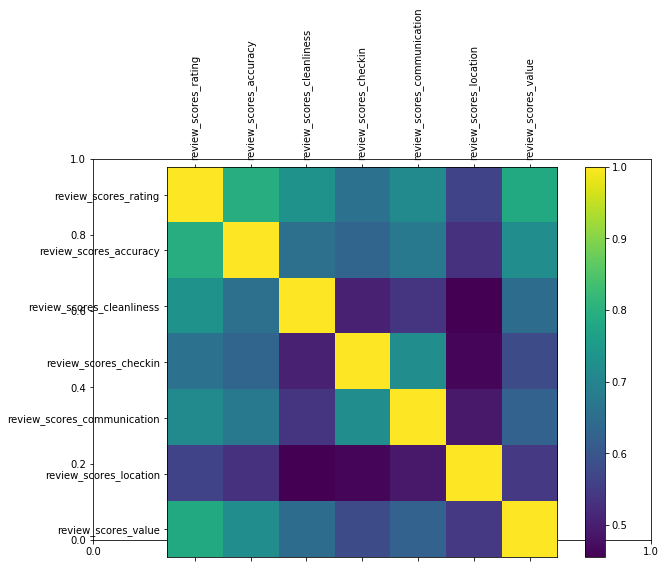

In [16]:
f, chale = plt.subplots(figsize=(10,7))
    
plt.matshow(corr_df.corr(), fignum=f.number)
plt.xticks(range(corr_df.shape[1]), corr_df.columns, fontsize=10, rotation=90)
plt.yticks(range(corr_df.shape[1]), corr_df.columns, fontsize=10)
plt.colorbar()
plt.show()